In [68]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
%matplotlib inline

## 3.6.4 Supervised Learning Potpourri

__Housing Market Predictions__

Use the following dataset to predict and understand what features contribute to a house's value.

https://www.kaggle.com/anthonypino/melbourne-housing-market


### Initial Data Prep

In [69]:
# load in raw data and inspect
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [70]:
# examine dtypes.  
#df.dtypes

In [71]:
# change data types of columns representing categorical data
category_list = ['Method', 'Type', 'SellerG', 'Postcode', 'Regionname', 'CouncilArea']
for category in category_list:
    df[category] = df[category].astype('category')

# change date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [72]:
# look for missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6831
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7209
Bathroom          7215
Car               7599
Landsize         10799
BuildingArea     18851
YearBuilt        17126
CouncilArea          3
Lattitude         6986
Longtitude        6986
Regionname           3
Propertycount        3
dtype: int64

__Impute Missing Values__

In [73]:
# replace numerical values with median 
df.fillna(df.median(), inplace=True)

# fill categorical null values with most frequent value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

# confirm no null values remain
#df.isnull().sum()

### Continous Variable Exploration

In [74]:
# look at correlation between continous variables
df.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.394637,0.269961,0.824791,0.493084,0.326873,0.029093,0.100581,-0.021349,0.002598,0.087331,-0.074486
Price,0.394637,1.000000,-0.175085,0.323505,0.288018,0.145449,0.028350,0.064669,-0.192509,-0.154487,0.141430,-0.051250
Distance,0.269961,-0.175085,1.000000,0.243378,0.104925,0.210826,0.043158,0.053010,0.211185,-0.106774,0.185253,-0.020563
Bedroom2,0.824791,0.323505,0.243378,1.000000,0.588827,0.380291,0.032149,0.109336,-0.011093,0.003040,0.103643,-0.050506
Bathroom,0.493084,0.288018,0.104925,0.588827,1.000000,0.329049,0.029798,0.100223,0.128554,-0.056372,0.107684,-0.023007
Car,0.326873,0.145449,0.210826,0.380291,0.329049,1.000000,0.033454,0.071563,0.095163,-0.009544,0.048651,-0.006764
Landsize,0.029093,0.028350,0.043158,0.032149,0.029798,0.033454,1.000000,0.087124,0.010187,0.020912,-0.002529,-0.012775
BuildingArea,0.100581,0.064669,0.053010,0.109336,0.100223,0.071563,0.087124,1.000000,0.009832,0.015907,-0.006120,-0.015792
YearBuilt,-0.021349,-0.192509,0.211185,-0.011093,0.128554,0.095163,0.010187,0.009832,1.000000,0.062745,-0.010144,0.015386
Lattitude,0.002598,-0.154487,-0.106774,0.003040,-0.056372,-0.009544,0.020912,0.015907,0.062745,1.000000,-0.350017,0.009224


In [75]:
# pull out variables with strong correlations to predicted variable (price)
correlated = df.loc[:, ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Longtitude']]
correlated.corr()

,Price,Rooms,Distance,Bedroom2,Bathroom,Car,YearBuilt,Longtitude
Price,1.000000,0.394637,-0.175085,0.323505,0.288018,0.145449,-0.192509,0.141430
Rooms,0.394637,1.000000,0.269961,0.824791,0.493084,0.326873,-0.021349,0.087331
Distance,-0.175085,0.269961,1.000000,0.243378,0.104925,0.210826,0.211185,0.185253
Bedroom2,0.323505,0.824791,0.243378,1.000000,0.588827,0.380291,-0.011093,0.103643
Bathroom,0.288018,0.493084,0.104925,0.588827,1.000000,0.329049,0.128554,0.107684
Car,0.145449,0.326873,0.210826,0.380291,0.329049,1.000000,0.095163,0.048651
YearBuilt,-0.192509,-0.021349,0.211185,-0.011093,0.128554,0.095163,1.000000,-0.010144
Longtitude,0.141430,0.087331,0.185253,0.103643,0.107684,0.048651,-0.010144,1.000000


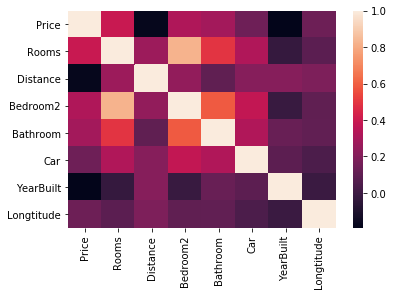

In [76]:
# visualize correlations of selected variables
sns.heatmap(correlated.corr())
plt.show()

In [77]:
# rooms and bedroom2 highly correlated.  Compare summary stats.
df[['Rooms', 'Bedroom2']].describe()

# Keep rooms, discard Bedroom2
continuous_features = df.loc[:, ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'YearBuilt', 'Longtitude']]

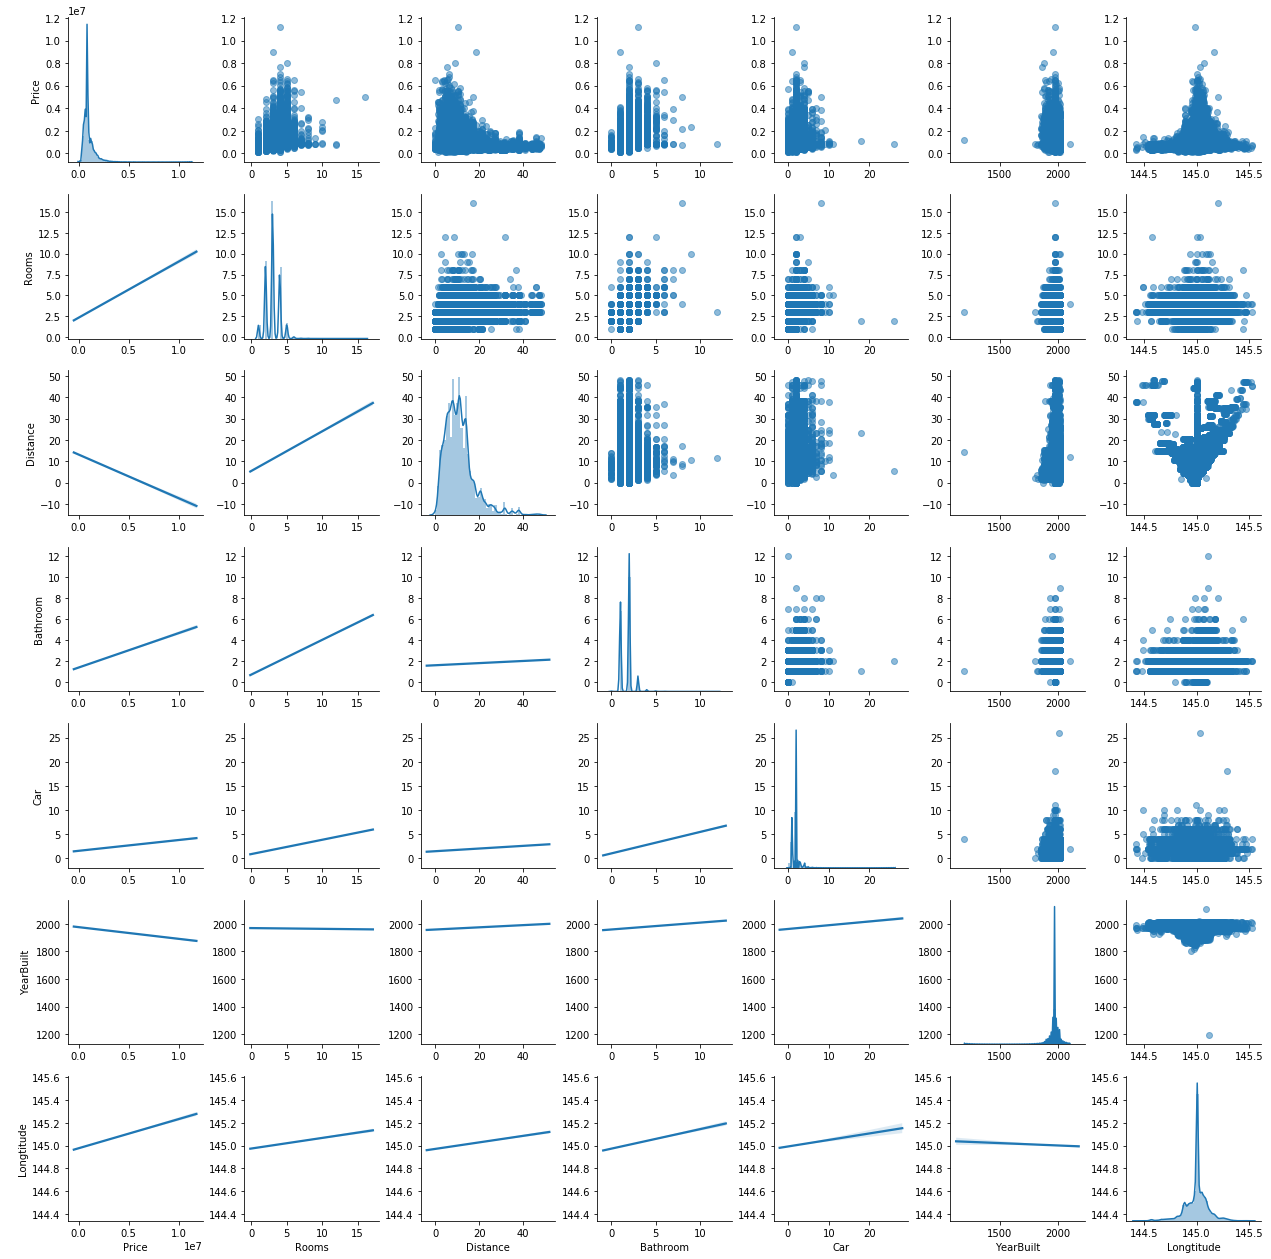

In [78]:
plt.figure(figsize=(10,8))

#Declare scatterplot matrix
g = sns.PairGrid(continuous_features, diag_sharey=False)

#Set upper matrix to scatter
g.map_upper(plt.scatter, alpha=.5)

#Set lower matrix to regression lines
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

#Set diagonals to distribution plot
g.map_diag(sns.distplot)
plt.show()

In [80]:
# Distributions look somewhat normal.  Exclude all rows where column contains 1+ outlier(s) beyond 2 standard deviations. 
from scipy import stats
continuous_features = continuous_features[(np.abs(stats.zscore(continuous_features)) <= 2.0).all(axis=1)]

In [81]:
continuous_features.shape

(21442, 7)

In [82]:
# revisit correlation
continuous_features.corr()

,Price,Rooms,Distance,Bathroom,Car,YearBuilt,Longtitude
Price,1.000000,0.382515,-0.104264,0.183017,0.181861,-0.151344,0.197345
Rooms,0.382515,1.000000,0.297153,0.367430,0.296876,-0.049937,0.109226
Distance,-0.104264,0.297153,1.000000,0.086635,0.153871,0.045824,0.285006
Bathroom,0.183017,0.367430,0.086635,1.000000,0.352054,0.161735,0.123786
Car,0.181861,0.296876,0.153871,0.352054,1.000000,-0.065310,0.087480
YearBuilt,-0.151344,-0.049937,0.045824,0.161735,-0.065310,1.000000,-0.051166
Longtitude,0.197345,0.109226,0.285006,0.123786,0.087480,-0.051166,1.000000


In [83]:
# drop distance and longitude.  We'll use regionname to encode geographical information.
continuous_features = continuous_features.drop(['Distance', 'Longtitude'], 1)

### Categorical Variable Exploration

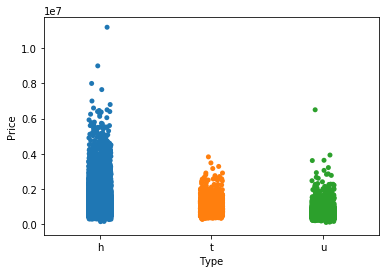

In [84]:
# Type of housing vs price
sns.stripplot(x=df['Type'], y=df['Price'], jitter=True)
plt.show()

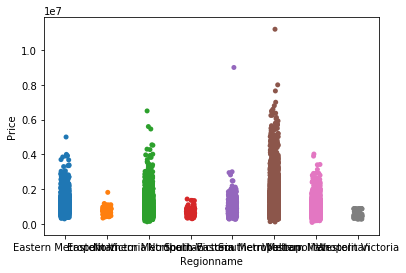

In [85]:
# Region name vs price
sns.stripplot(x=df['Regionname'], y=df['Price'], jitter=True)
plt.show()

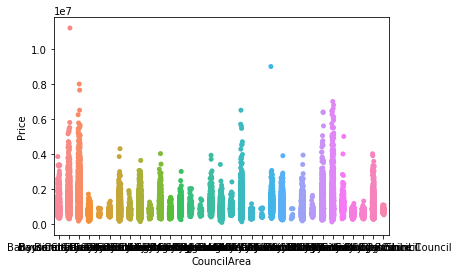

In [86]:
# Council area vs price
sns.stripplot(x=df['CouncilArea'], y=df['Price'], jitter=True)
plt.show()

In [90]:
# select housing type and region name as features
categorical_features = df.loc[:, ['Type', 'Regionname']]

In [91]:
# create dummy variables for categoricl features
categorical_features = pd.get_dummies(data=categorical_features)

In [92]:
categorical_features.head()

,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0


### Model Data


In [93]:
# Grab data from exploration above

# drop one dummy variable from each category
X_categorical = categorical_features.drop(columns=['Type_u', 'Regionname_Western Victoria'])

# drop target value from continuous features
X_continuous = continuous_features.drop('Price', 1)

# join X dataframes.  Join categorical to continuous to account for removed outlier data.  --> left join
X = X_continuous.join(X_categorical)

In [94]:
# define model inputs
Y = continuous_features.loc[:, 'Price']
Y.shape

(21442,)

In [95]:
print(X.shape)
print(Y.shape)

(21442, 13)
(21442,)


__Model Data__

For modeling the data, I want to experiment and compare the performance of several types of regression models:

*Linear Regression Models*
* Simple Ordinary Least Sqaures 
* LASSO 

*Support Vector Regression *

*Random Forest Regression*
* With and without gradient boosting

__OLS__

In [113]:
# OLS 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

OLS = LinearRegression()
OLS.fit(X, Y)
scores = cross_val_score(OLS, X, Y, cv=10)
print(scores.mean())

0.3032958202185524


__LASSO__

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\si

Text(0,0.5,'MSE')

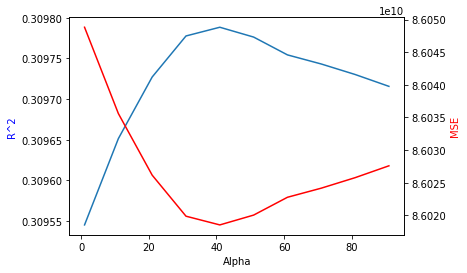

In [97]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso()

# Create holders for coefficients 
lasso_r_squared = []
lasso_errors = []

# Generate range of alpha values
alphas = np.arange(1, 100, 10)

# Train model with different regularization values
for a in alphas:
    lasso.set_params(alpha=a, fit_intercept=False)
    lasso.fit(X, Y)
    y_pred = lasso.predict(X)
    lasso_r_squared.append(lasso.score(X, Y))
    lasso_errors.append(mean_squared_error(y_pred, Y))

# Display results
plt.figure(figsize=(15,8))

fig, ax1 = plt.subplots()

ax1.plot(alphas, lasso_r_squared)
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R^2', color='b')

ax2 = ax1.twinx()
ax2.plot(alphas, lasso_errors, color='r')
ax2.set_ylabel('MSE', color='r')

In [98]:
lasso = Lasso(alpha=0.35)
lasso.fit(X, Y)
lasso_scores = cross_val_score(lasso, X, Y, cv=5)
print(lasso_scores.mean())

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\si

0.3077609945368325


c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


__SVR__

In [99]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X, Y)
svr_scores = cross_val_score(svr, X, Y, cv=5)
print(svr_scores)

[-0.05460893 -0.00253004 -0.03833702 -0.0411381  -0.04362105]


__Random Forest__

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
        criterion='mse',
        max_depth=5)

forest.fit(X,Y)
forest_scores = cross_val_score(forest, X, Y, cv=5)
print(forest_scores)
print(forest_scores.mean())

[0.36692443 0.3077735  0.30452334 0.33569973 0.31175314]
0.325334825358253


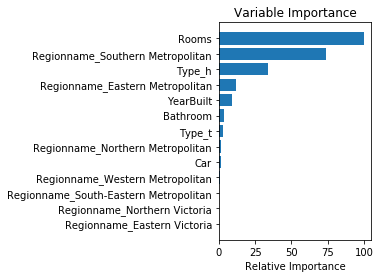

In [102]:
feature_importance = forest.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [103]:
# Random Forest w/ Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
        loss='ls',
        n_estimators=100,
        max_depth=5, 
        subsample=0.5, 
)

gbr.fit(X,Y)
gbr.score(X,Y)

0.3865945025646792

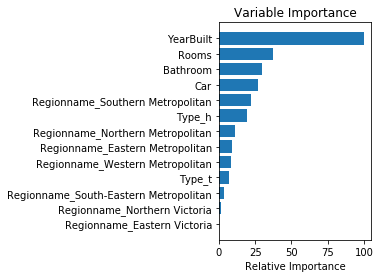

In [104]:
feature_importance = gbr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Try standardizing all features

In [105]:
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [106]:
# retry OLS
OLS_scaled = LinearRegression()
OLS_scaled.fit(X_scaled, Y)
scores = cross_val_score(OLS_scaled, X_scaled, Y, cv=10)
print(scores.mean())

0.30317074420987716


In [107]:
# Random Forest w/ Gradient Boosting
gbr_scaled = GradientBoostingRegressor(
        loss='ls',
        n_estimators=100,
        max_depth=5, 
        subsample=0.5, 
)

gbr_scaled.fit(X_scaled,Y)
gbr_scaled.score(X_scaled,Y)

0.386651378577868

### Conclusions:

* Best performing model was Gradient Boosting Regressor with an accuracy of 38%
* Most important features for predicting price were: year built, number of rooms/bathrooms, housing type, and if the region was Southern Metro
* Scaling data did not improve model performance